# MintPy Processing

## Setup

In [2]:
# %matplotlib widget
%matplotlib inline
import glob
import sys
import shutil
import os
import matplotlib.pyplot as plt
from mintpy.utils import readfile
from mintpy import workflow, view, tsview, plot_network, plot_transection, plot_coherence_matrix
from mintpy.unwrap_error_phase_closure import plot_num_triplet_with_nonzero_integer_ambiguity

In [3]:
cd /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy

/u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy


In [48]:
!pwd

/u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy


In [49]:
!nproc

32


In [50]:
# ~30 GB of ram
!cat /proc/meminfo

MemTotal:       131447096 kB
MemFree:         4315924 kB
MemAvailable:   66721968 kB
Buffers:            2852 kB
Cached:         59428356 kB
SwapCached:        24836 kB
Active:         12926144 kB
Inactive:       49670276 kB
Active(anon):    2349060 kB
Inactive(anon):   844544 kB
Active(file):   10577084 kB
Inactive(file): 48825732 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:       4194296 kB
SwapFree:        4147960 kB
Dirty:                20 kB
Writeback:             0 kB
AnonPages:       3161816 kB
Mapped:           150208 kB
Shmem:             28392 kB
Slab:           16524612 kB
SReclaimable:    3629296 kB
SUnreclaim:     12895316 kB
KernelStack:       19584 kB
PageTables:        19496 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:    69917844 kB
Committed_AS:   13655148 kB
VmallocTotal:   34359738367 kB
VmallocUsed:     3092280 kB
VmallocChunk:   34286851984 kB
Percpu:            81920 kB
HardwareCorru

## A note on the los files:

**From Eric:** Checked the geom_reference/los.rdr file and it is actually BSQ, but the los.rdr.xml file has the scheme as BIP. This explains why MintPy is reading it wrong. Hand-edited the xml file and ran fixImageXml.py to generate the corrected los.rdr.vrt file. Also edited the los.rdr.rsc file to correct the scheme there.

## load_data

In [77]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S1.cfg --dostep load_data

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-08-04 14:51:52.924155--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
Run routine processing with smallbaselineApp.py on steps: ['load_data']
Remaining steps: ['modify_network', 'reference_point', 'quick_overview', 'correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S1
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/JPL_internship/Haywrd_05502_01-S1.cfg
update default template based on input custom template
    mintpy.load.updateMode: yes --> no
    mintpy.load.metaFile: ../Igrams/\*/referenceShelve/data.dat --> ../Igram

## Check for correct loading of incidence angle

view.py inputs/geometryRadar.h5 azimuthAngle incidenceAngle --noverbose


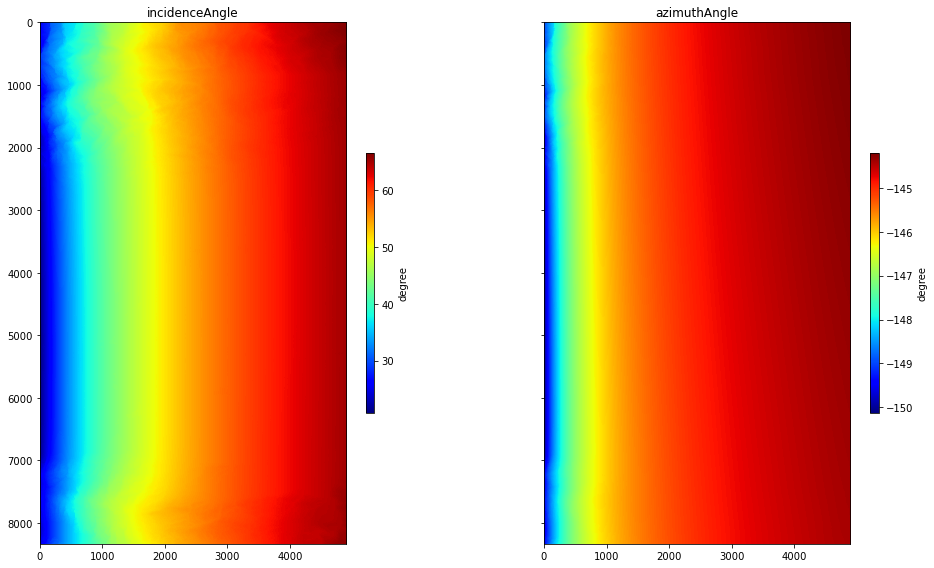

In [78]:
fig = view.main('inputs/geometryRadar.h5 azimuthAngle incidenceAngle --noverbose'.split())

Outputs look good, don't need to edit the xml files!

## Generate Water Mask

input geometry file: ./inputs/geometryRadar.h5
read ./inputs/geometryRadar.h5 waterMask
create initial mask with the same size as the input file and all = 1
all pixels with nan value = 0
exclude pixels with value < 0.5
delete exsited file: waterMask.h5
create HDF5 file: waterMask.h5 with w mode
create dataset /mask of bool       in size of (8333, 4892)         with compression=None
finished writing to waterMask.h5
time used: 00 mins 0.4 secs.
view.py waterMask.h5 --noverbose


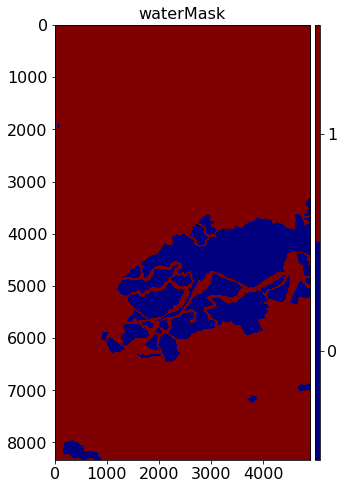

In [79]:
!generate_mask.py ./inputs/geometryRadar.h5 waterMask -m 0.5 -o waterMask.h5
view.main('waterMask.h5 --noverbose'.split())

## modify_network

There are quite a few interferograms with large phase differences, but for now let's just remove interferograms with phase discontinuities [0,2,18]. For more information on why this decision was made, see `network_selection.ipynb`

In [51]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S1.cfg --dostep modify_network

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-08-11 18:50:20.288631--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
Run routine processing with smallbaselineApp.py on steps: ['modify_network']
Remaining steps: ['reference_point', 'quick_overview', 'correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S1
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/JPL_internship/Haywrd_05502_01-S1.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/smallbaselineApp.cfg
r

view.py ./inputs/ifgramStack.h5 unwrapPhase -m waterMask.h5 --vlim -50 50 --noverbose


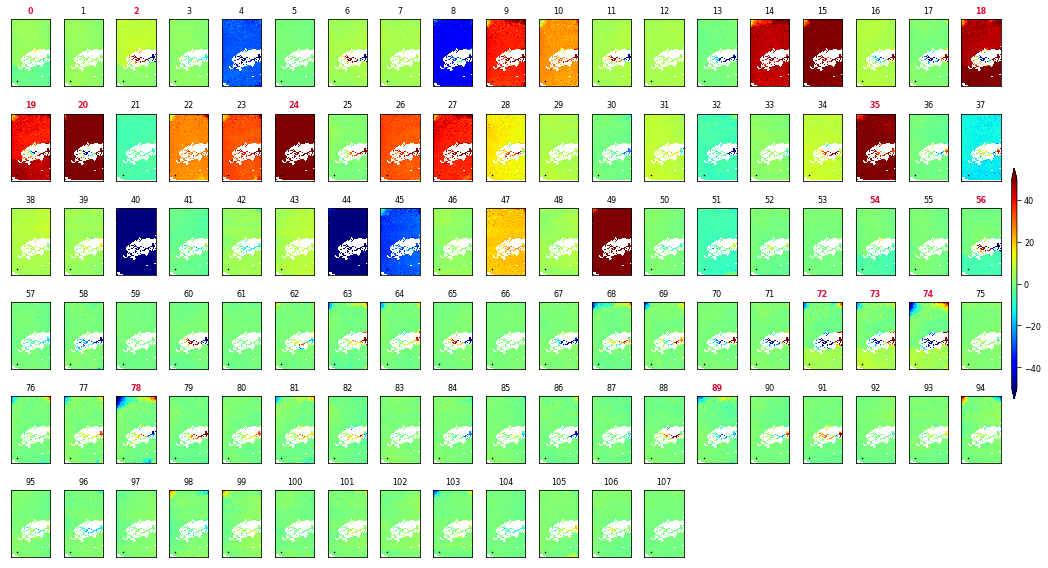

In [52]:
view.main('./inputs/ifgramStack.h5 unwrapPhase -m waterMask.h5 --vlim -50 50 --noverbose'.split())

read options from template file: Haywrd_05502_01-S1.cfg
read temporal/spatial baseline info from file: ./inputs/ifgramStack.h5
['coherenceSpatialAvg.txt'] exists and is newer than ['./inputs/ifgramStack.h5', 'waterMask.h5'] --> skip.
coherenceSpatialAvg.txt already exists, read it directly
number of acquisitions: 19
number of interferograms: 54
shift all perp baseline by 0.0 to zero mean for plotting
--------------------------------------------------
number of interferograms marked as drop: 7
number of interferograms marked as keep: 47
number of acquisitions marked as drop: 0
max perpendicular baseline: 0.00 m
max temporal      baseline: 798.0 days
showing coherence
data range: [0.379, 0.8223]
display range: (0.2, 1.0)


/home/fwilliam/tools/MintPy/mintpy/utils/plot.py:464: UserWarning: Attempting to set identical bottom == top == 0.0 results in singular transformations; automatically expanding.
  ax.set_ylim([ymin, ymax])


showing ...


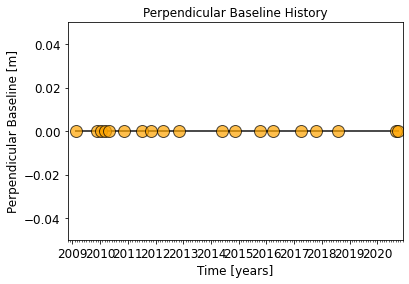

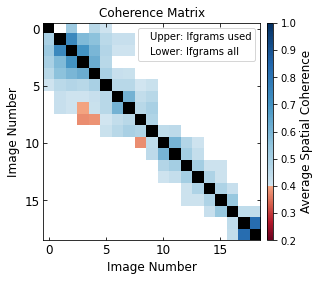

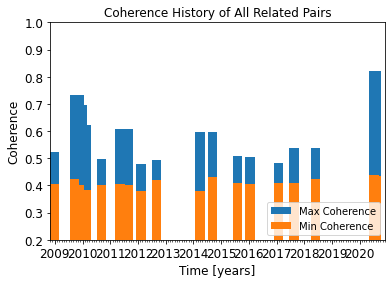

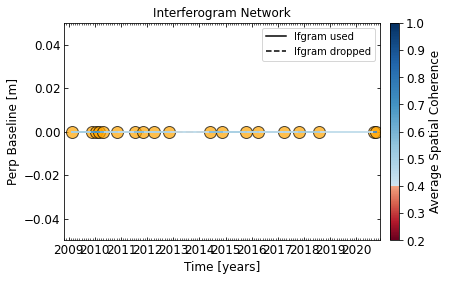

In [56]:
plot_network.main('./inputs/ifgramStack.h5 -t ../JPL_internship/Haywrd_05502_01-S1.cfg'.split())

Dropped 7 of 54 interferograms, but still have fully connected network with avgSpatialCoh > 0.4 threshold

## reference_point

In [58]:
!reference_point.py inputs/ifgramStack.h5 --reset
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S1.cfg --dostep reference_point

remove REF_Y/X and/or REF_LAT/LON from file: inputs/ifgramStack.h5
Done.
MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-08-11 18:54:34.234988--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
Run routine processing with smallbaselineApp.py on steps: ['reference_point']
Remaining steps: ['quick_overview', 'correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S1
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/JPL_internship/Haywrd_05502_01-S1.cfg
update default template based on input custom template
    mintpy.load.metaFile: ../Igrams/\*/referenceShelve/data.dat --> ../Ig

## quick_overview

In [59]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S1.cfg --dostep quick_overview

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-08-11 18:56:33.788831--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
Run routine processing with smallbaselineApp.py on steps: ['quick_overview']
Remaining steps: ['correct_unwrap_error', 'invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S1
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/JPL_internship/Haywrd_05502_01-S1.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/smallbaselineApp.cfg
read default template file: /u/sar-r2/

view.py avgPhaseVelocity.h5 --noverbose -m waterMask.h5 --vlim -3 3


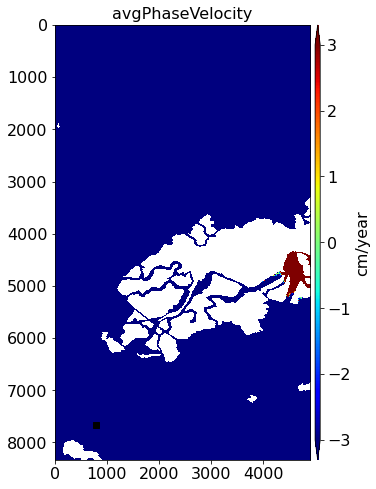

plot and save figure to file numTriNonzeroIntAmbiguity.png


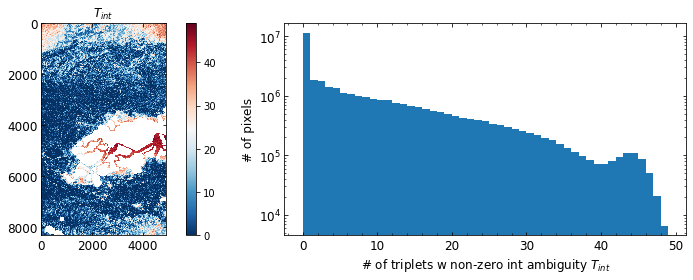

In [60]:
view.main('avgPhaseVelocity.h5 --noverbose -m waterMask.h5 --vlim -3 3'.split())
plot_num_triplet_with_nonzero_integer_ambiguity('numTriNonzeroIntAmbiguity.h5', display=True, fig_size=[12, 4])

## correct_unwrap_error

In [61]:
!generate_mask.py inputs/ifgramStack.h5 --nonzero -o maskConnComp.h5

input ifgramStack file: inputs/ifgramStack.h5
calculate the common mask of pixels with non-zero connectComponent value
[==================================================] 47/47   14s /     0s 
delete exsited file: maskConnComp.h5
create HDF5 file: maskConnComp.h5 with w mode
create dataset /mask of bool       in size of (8333, 4892)         with compression=None
finished writing to maskConnComp.h5


In [62]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S1.cfg --dostep correct_unwrap_error

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-08-11 19:03:58.750269--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
Run routine processing with smallbaselineApp.py on steps: ['correct_unwrap_error']
Remaining steps: ['invert_network', 'correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S1
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/JPL_internship/Haywrd_05502_01-S1.cfg
update default template based on input custom template
    mintpy.load.metaFile: ../Igrams/\*/referenceShelve/data.dat --> ../Igrams/*/referenceShelve/data.dat
    mintpy.load.unwFile: ../Igrams/\*/filt_\*.unw --> ../Igrams/*/filt_*.unw
 

## invert_network
This takes a while so we write it to a log

In [ ]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S1.cfg --dostep invert_network |& tee -i invert.log ; python ../JPL_internship/emailme.py

In [64]:
!cat invert.log

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-08-11 19:04:11.681532--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
Run routine processing with smallbaselineApp.py on steps: ['invert_network']
Remaining steps: ['correct_LOD', 'correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S1
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/JPL_internship/Haywrd_05502_01-S1.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_

## correct_LOD

In [65]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S1.cfg --dostep correct_LOD

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-08-12 12:53:44.370335--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
Run routine processing with smallbaselineApp.py on steps: ['correct_LOD']
Remaining steps: ['correct_SET', 'correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S1
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/JPL_internship/Haywrd_05502_01-S1.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/small

## correct_SET

In [66]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S1.cfg --dostep correct_SET

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-08-12 12:53:50.902243--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
Run routine processing with smallbaselineApp.py on steps: ['correct_SET']
Remaining steps: ['correct_troposphere', 'deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S1
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/JPL_internship/Haywrd_05502_01-S1.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/smallbaselineApp.cfg

## correct_troposphere

In [67]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S1.cfg --dostep correct_troposphere

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-08-12 12:53:56.672699--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
Run routine processing with smallbaselineApp.py on steps: ['correct_troposphere']
Remaining steps: ['deramp', 'correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S1
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/JPL_internship/Haywrd_05502_01-S1.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/smallbaselineApp.cfg


************

## deramp

In [68]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S1.cfg --dostep deramp

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-08-12 12:54:05.611217--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
Run routine processing with smallbaselineApp.py on steps: ['deramp']
Remaining steps: ['correct_topography', 'residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S1
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/JPL_internship/Haywrd_05502_01-S1.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/smallbaselineApp.cfg


******************** step - deramp 

## correct_topography

In [69]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S1.cfg --dostep correct_topography

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-08-12 12:55:08.550522--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
Run routine processing with smallbaselineApp.py on steps: ['correct_topography']
Remaining steps: ['residual_RMS', 'reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S1
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/JPL_internship/Haywrd_05502_01-S1.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/smallbaselineApp.cfg


******************** step - correct_topograph

## residual_RMS

In [70]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S1.cfg --dostep residual_RMS

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-08-12 12:55:15.485786--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
Run routine processing with smallbaselineApp.py on steps: ['residual_RMS']
Remaining steps: ['reference_date', 'velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S1
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/JPL_internship/Haywrd_05502_01-S1.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/smallbaselineApp.cfg


******************** step - residual_RMS ********************
No re

## reference_date

In [71]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S1.cfg --dostep reference_date

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-08-12 12:55:21.444272--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
Run routine processing with smallbaselineApp.py on steps: ['reference_date']
Remaining steps: ['velocity', 'geocode', 'google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S1
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/JPL_internship/Haywrd_05502_01-S1.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/smallbaselineApp.cfg


******************** step - reference_date ********************

reference_date.py 

## velocity

In [ ]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S1.cfg --dostep velocity |& tee -i velocity.log ; python ../JPL_internship/emailme.py

## geocode

In [8]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S1.cfg --dostep geocode

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-08-12 15:10:15.468879--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
Run routine processing with smallbaselineApp.py on steps: ['geocode']
Remaining steps: ['google_earth', 'hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S1
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/JPL_internship/Haywrd_05502_01-S1.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/smallbaselineApp.cfg


******************** step - geocode ********************

geocode.py /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywr

## google_earth

In [9]:
!smallbaselineApp.py ../JPL_internship/Haywrd_05502_01-S1.cfg --dostep google_earth

MintPy release version v1.3.0-83, release date 2021-07-30
--RUN-at-2021-08-12 15:12:43.574939--
Current directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
Run routine processing with smallbaselineApp.py on steps: ['google_earth']
Remaining steps: ['hdfeos5']
--------------------------------------------------
Project name: Haywrd_05502_01-S1
Go to work directory: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy
read custom template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/JPL_internship/Haywrd_05502_01-S1.cfg
update default template based on input custom template
No new option value found, skip updating /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/smallbaselineApp.cfg
read default template file: /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/smallbaselineApp.cfg


******************** step - google_earth ********************
creating Google Earth KMZ file for geocoded velocity file: ...

## Export to GDAL

In [10]:
!save_gdal.py ./geo/geo_velocity.h5 -o ./geo/velocity.tif

read metadata from file: ./geo/geo_velocity.h5
read data     from file: ./geo/geo_velocity.h5
initiate GDAL driver: GeoTIFF
create raster band
raster row / column number: 8333, 4892
raster transform info: (-122.30984445672122, 0.00010578355962721709, 0, 37.60865271806831, 0, -4.3168070221313536e-05)
write data to raster band
set projectection as: EPSG 4326
finished writing to /u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy/geo/velocity.tif


## View Results

### Dem with velocity overlay

view.py ./geo/geo_velocity.h5 velocity --dem ./geo/geo_geometryRadar.h5 --shade-exag 0.05 --figsize 12 12 --notitle --notick --noaxis --noverbose --vlim -2 2 -o velocity_dem.png


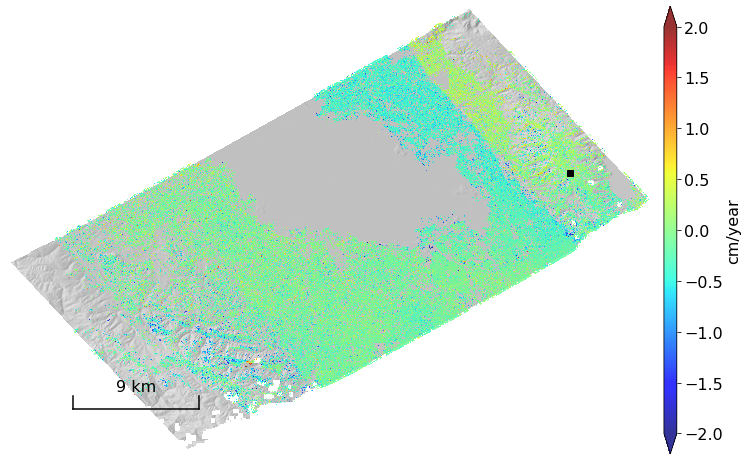

In [17]:
view.main('./geo/geo_velocity.h5 velocity --dem ./geo/geo_geometryRadar.h5 --shade-exag 0.05 --figsize 12 12 --notitle --notick --noaxis --noverbose --vlim -2 2 -o velocity_dem.png'.split())

### Temporal Coherence

view.py temporalCoherence.h5 --noverbose


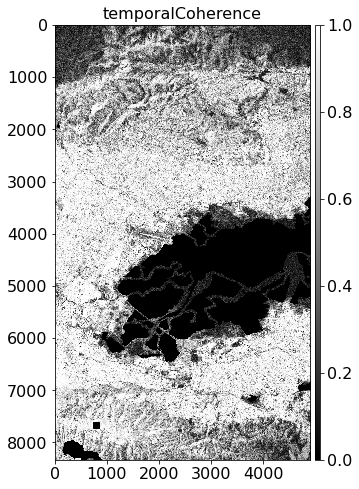

In [13]:
view.main('temporalCoherence.h5 --noverbose'.split())

### Phase Ambiguity

plot and save figure to file numTriNonzeroIntAmbiguity.png


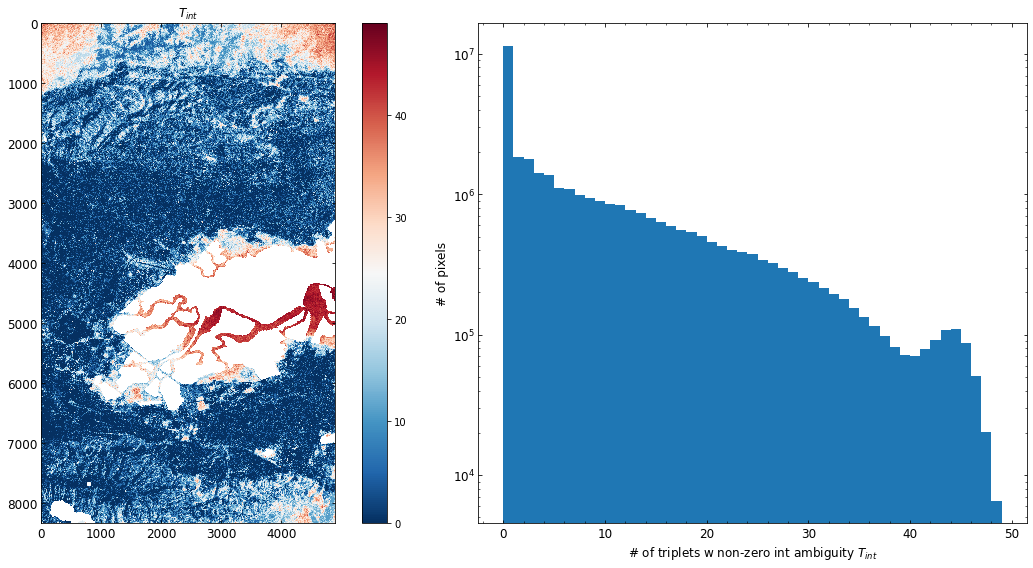

In [14]:
from mintpy.unwrap_error_phase_closure import plot_num_triplet_with_nonzero_integer_ambiguity
plot_num_triplet_with_nonzero_integer_ambiguity('numTriNonzeroIntAmbiguity.h5', display=True, fig_size=[16, 8])

### Velocity with VelocityStd

view.py velocity.h5 --noverbose


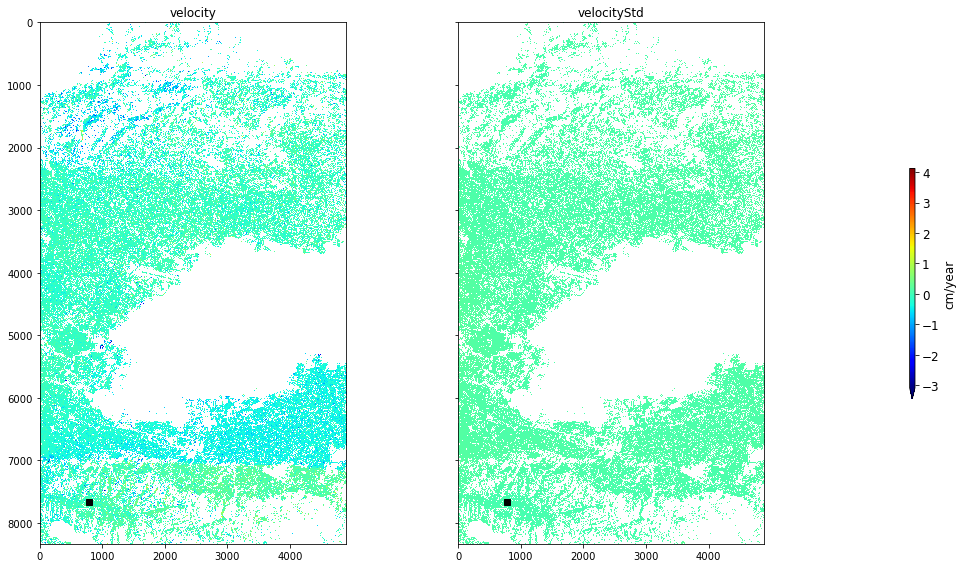

In [15]:
view.main('velocity.h5 --noverbose'.split())

view.py velocity.h5 --noverbose --vlim -2 2


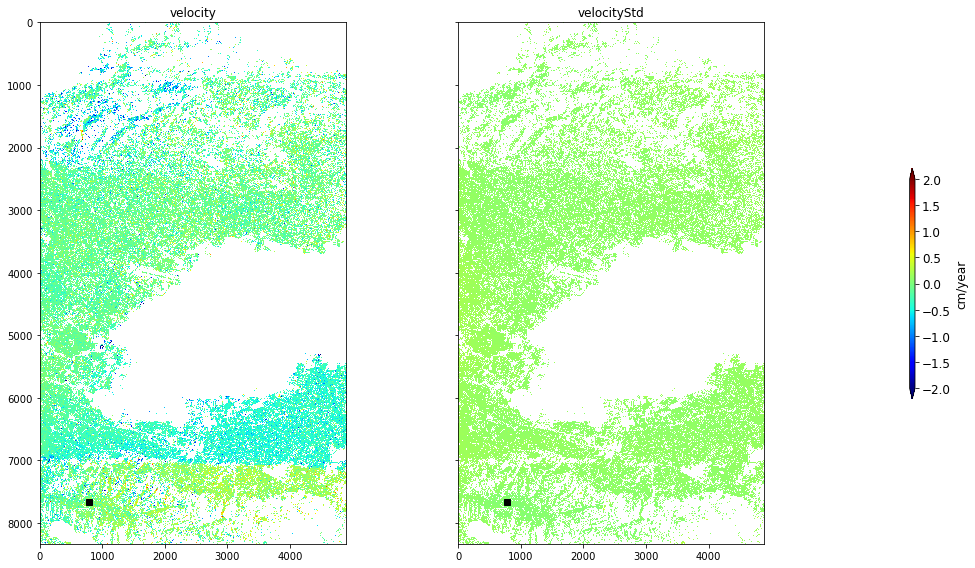

In [16]:
view.main('velocity.h5 --noverbose --vlim -2 2'.split())

In [21]:
%matplotlib widget
import matplotlib.pyplot as plt
# !generate_mask.py avgSpatialCoh.h5 -m 0.85 -o avgSpatialCohMask.h5
view.main('avgSpatialCoh.h5 --vlim 0.8 1.0 --noverbose'.split())

view.py avgSpatialCoh.h5 --vlim 0.8 1.0 --noverbose


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

## Store Result Files

In [39]:
mkdir run01
mv *.* ./run01/
mv ./run01/waterMask.h5 .
cp ./pic/Haywrd_05502_01-S1.cfg ./run01/

In [57]:
pwd

'/u/sar-r2/fwilliam/Calif/UAVSAR/Stacks/Haywrd_05502_01-S1/mintpy'